# **Pandas Week 08**

## **#29 Random Sampling pada Pandas Data Frame**

### Import Modules

In [1]:
import pandas as pd

# Cek versi
print(pd.__version__)

1.3.4


### Persiapan Data Frame

- Membuat dataframe dengan dua buah kolom yang setiap kolom memiliki 5 value.

In [2]:
d = {'col_1':[1, 2, 3, 4, 5], 
     'col_2':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


### **Random Sampling with/without Replacement**
- Method sample() membutuhkan tiga buah parameter.
- Parameter pertama adalah jumlah data.
- Parameter kedua adalah sampling with/without replacement.
- Parameter ketiga berkorelasi dengan random sheet number. Fungsi ini bertujuan untuk menjamin suatu eksperimen bisa di replikasi dengan hasil yang sama persis.

In [3]:
df.sample(n=4, replace=False, random_state=0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [4]:
df.sample(n=4, replace=True, random_state=0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


## **#30 Akses Nilai Variabel Dalam Fungsi Query**

### Import Modules

In [5]:
import pandas as pd
import numpy as np

# Cek versi
print(pd.__version__)
print(np.__version__)

1.3.4
1.20.3


### Persiapan Data Frame
- Buatlah dataframe dengan lima buah baris dan kolom.
- Beri nama setiap kolom berasal dari tuple('ABCDE').
- Kemudian Isi setiap kolom berupa random integer dengan rentang 1 - 20.

In [6]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,12,7,12,7,10
1,3,12,1,1,12
2,12,8,12,13,16
3,12,3,3,10,8
4,7,9,17,1,10


### Akses Nilai Variabel pada query()
- Method query digunakan untuk menyeleksi baris.

In [7]:
df.query('A > 10') # menyeleksi baris pada kolom A yang memiliki nilai lebih dari 10

,A,B,C,D,E
0,12,7,12,7,10
2,12,8,12,13,16
3,12,3,3,10,8


In [8]:
rerata = df['A'].mean() # menghitung rata-rata dari kolom A
rerata

9.2

In [9]:
df.query('A > @rerata') # menampilkan baris nilai yang lebih besar dari rata-rata

,A,B,C,D,E
0,12,7,12,7,10
2,12,8,12,13,16
3,12,3,3,10,8


## **#31 Tipe Data Ordinal pada Pandas Data Frame**

### Import Modules

In [10]:
import pandas as pd

# Cek versi
print(pd.__version__)

1.3.4


### Persiapan Data Frame
- Membuat dua buah kolom yang memiliki 4 value/ baris.

In [11]:
d = {'pelanggan':[11, 12, 13, 14], 
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


### Tipe Data Ordinal pada Pandas
- Untuk memberi tahu komputer cara menilai tingkatan ordinal, dapat digunakan module CategoricalDtype dari pandas.api.types.
- CategoricalDtype digunakan untuk menspesifikasikan urutan tingkatan ordinal.

In [12]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], 
                                    ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan) # membuat kolom kepuasan memiliki tingkat ordinal
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [13]:
df = df.sort_values('kepuasan', ascending=True) # mengurutkan dataframe berdasarkan kolom kepuasan
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [14]:
df[df['kepuasan'] >= 'cukup'] # menampilkan dataframe yang nilai kolom kepuasan lebih besar dari cukup

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


## **#32 Plotting dari Suatu Pandas Data Frame**

### import Modules

In [15]:
import pandas as pd
import numpy as np

# Cek versi
print(pd.__version__)
print(np.__version__)

1.3.4
1.20.3


### Persiapan Data Frame
- Membuat dataframe dengan 40 baris dan 5 kolom dengan nama kolom yang berasal dari tuple.
- Value setiap kolom berisi dari rentang 1 - 20.

In [16]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


## Line Plot
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai line.
- Untuk menampilkan beberapa kolom saja kita bisa menggunakan df[[...]].plot().

In [17]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:>

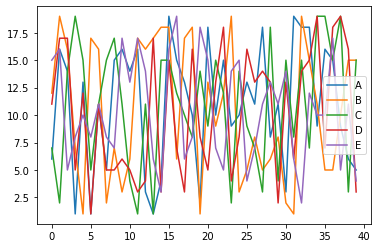

In [18]:
df.plot(kind='line')

<AxesSubplot:>

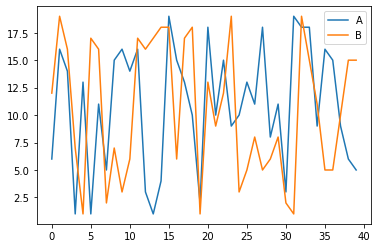

In [19]:
df[['A', 'B']].plot(kind='line')

### Bar Plot
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil - fungsi df.plot() yang diberi parameter kind yang bernilai bar.
Untuk menampilkan bar secara horizontal kita dapat menggantikan bar dengan barh.

In [20]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:>

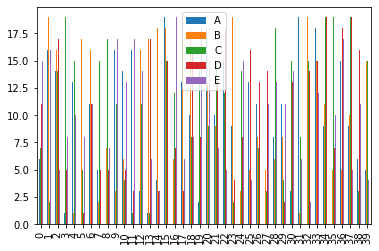

In [21]:
df.plot(kind='bar')

<AxesSubplot:>

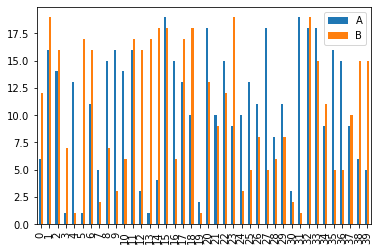

In [22]:
df[['A', 'B']].plot(kind='bar')

<AxesSubplot:>

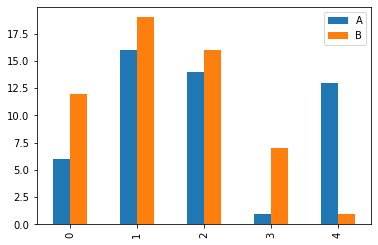

In [23]:
df[['A', 'B']].head().plot(kind='bar')

<AxesSubplot:>

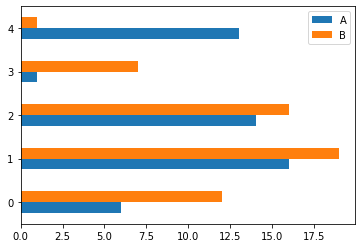

In [24]:
df[['A', 'B']].head().plot(kind='barh')

## **Area Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai area.

In [25]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:>

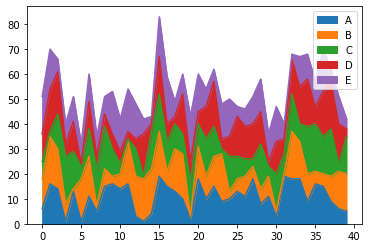

In [26]:
df.plot(kind='area')

<AxesSubplot:>

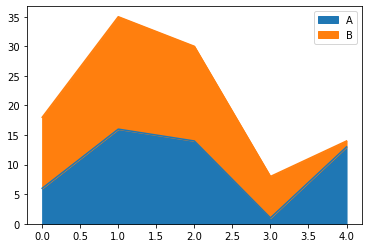

In [27]:
df[['A', 'B']].head().plot(kind='area')

## **Box Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai box.

In [28]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:>

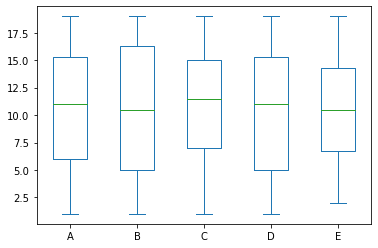

In [29]:
df.plot(kind='box')

## **Histogram**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai hist.

In [30]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:ylabel='Frequency'>

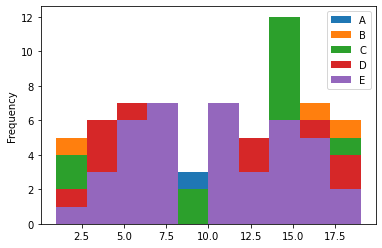

In [31]:
df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

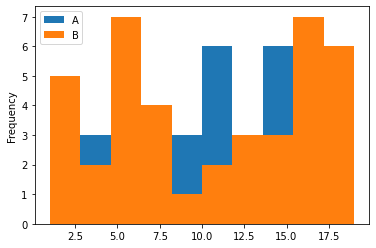

In [32]:

df[['A', 'B']].plot(kind='hist')

## **Kernel Density Estimation (KDE)**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai kde.

In [33]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:ylabel='Density'>

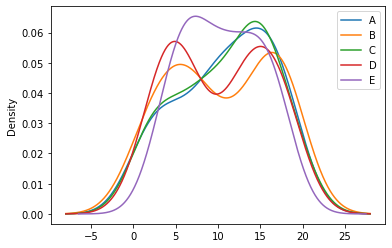

In [34]:
df.plot(kind='kde')

## **Scatter Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai scatter.

In [35]:
df.head()

,A,B,C,D,E
0,6,12,7,11,15
1,16,19,2,17,16
2,14,16,14,17,5
3,1,7,19,5,8
4,13,1,15,12,10


<AxesSubplot:xlabel='A', ylabel='B'>

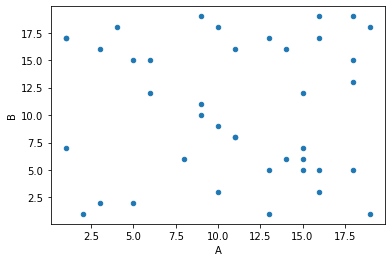

In [36]:
df.plot(x='A', y='B', kind='scatter')